In [2]:
import pandas as pd

import os

print(os.getcwd())

path_to_csv = "../Video_Games_Sales_as_at_22_Dec_2016.csv"
df_vg_sales = pd.read_csv(path_to_csv)

C:\Users\qwert\PycharmProjects\dataminingproject\gradient_boost_regression


**Let's have a look at the dataset**

In [3]:
df_vg_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


We select our features as 'Critic_Score', 'Year_of_Release', 'Genre'. We want to predict 'Global Sales'.
**Drop 'NA' Values in the respective columns**

In [4]:
feature_columns = ['Critic_Score', 'Critic_Count', 'Year_of_Release', 'Genre', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Platform', 'Genre', 'Publisher']
prediction_column = ['Global_Sales']
all_columns = feature_columns + prediction_column

print("Dropping NA Values in following columns")
for column in all_columns:
  print(column)
print(f"Before dropping NA Values Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")
df_vg_sales = df_vg_sales.dropna(subset=all_columns)
print(f"After dropping NA Values: Video Game Sales Data has {df_vg_sales.shape[0]} entries with a total of {df_vg_sales.shape[1]} columns.")

Dropping NA Values in following columns
Critic_Score
Critic_Count
Year_of_Release
Genre
User_Score
User_Count
Developer
Rating
Platform
Genre
Publisher
Global_Sales
Before dropping NA Values Video Game Sales Data has 16719 entries with a total of 16 columns.
After dropping NA Values: Video Game Sales Data has 6825 entries with a total of 16 columns.


In [5]:
df_vg_sales[all_columns].head(10)

,Critic_Score,Critic_Count,Year_of_Release,Genre,User_Score,User_Count,Developer,Rating,Platform,Genre,Publisher,Global_Sales
0,76.0,51.0,2006.0,Sports,8,322.0,Nintendo,E,Wii,Sports,Nintendo,82.53
2,82.0,73.0,2008.0,Racing,8.3,709.0,Nintendo,E,Wii,Racing,Nintendo,35.52
3,80.0,73.0,2009.0,Sports,8,192.0,Nintendo,E,Wii,Sports,Nintendo,32.77
6,89.0,65.0,2006.0,Platform,8.5,431.0,Nintendo,E,DS,Platform,Nintendo,29.80
7,58.0,41.0,2006.0,Misc,6.6,129.0,Nintendo,E,Wii,Misc,Nintendo,28.92
8,87.0,80.0,2009.0,Platform,8.4,594.0,Nintendo,E,Wii,Platform,Nintendo,28.32
11,91.0,64.0,2005.0,Racing,8.6,464.0,Nintendo,E,DS,Racing,Nintendo,23.21
13,80.0,63.0,2007.0,Sports,7.7,146.0,Nintendo,E,Wii,Sports,Nintendo,22.70
14,61.0,45.0,2010.0,Misc,6.3,106.0,Good Science Studio,E,X360,Misc,Microsoft Game Studios,21.81
15,80.0,33.0,2009.0,Sports,7.4,52.0,Nintendo,E,Wii,Sports,Nintendo,21.79


Convert caterogical values into numbers/integers

PS3 -> 0
Wii -> 1
.
.
.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
for column in feature_columns:
  try:
    int(df_vg_sales.loc[0,column])
  except: # if it isn't a number -> label encoding
      df_vg_sales[column] = label_encoder.fit_transform(df_vg_sales[column])

In [7]:
df_vg_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,160,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,771,1
2,Mario Kart Wii,12,2008.0,6,160,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771,1
3,Wii Sports Resort,12,2009.0,10,160,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,771,1
6,New Super Mario Bros.,2,2006.0,4,160,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771,1
7,Wii Play,12,2006.0,3,160,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771,1
8,New Super Mario Bros. Wii,12,2009.0,4,160,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,771,1
11,Mario Kart DS,2,2005.0,6,160,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,771,1
13,Wii Fit,12,2007.0,10,160,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,771,1
14,Kinect Adventures!,14,2010.0,3,144,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,469,1
15,Wii Fit Plus,12,2009.0,10,160,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,771,1


Select features and prediction co

In [8]:
features = df_vg_sales[feature_columns]
target = df_vg_sales['Global_Sales']

In [9]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train.head(10)

,Critic_Score,Critic_Count,Year_of_Release,Genre,User_Score,User_Count,Developer,Rating,Platform,Genre,Publisher
2160,87.0,29.0,2005.0,0,8.6,53.0,1189,4,7,0,237
2976,89.0,29.0,2004.0,10,8,12.0,345,1,15,10,61
3430,77.0,56.0,2012.0,2,6.2,124.0,863,6,14,2,155
7997,72.0,27.0,2003.0,0,8.9,47.0,385,6,7,0,246
10814,78.0,30.0,2008.0,8,7.7,17.0,184,1,12,8,60
5695,72.0,42.0,2009.0,0,7.6,24.0,1173,6,8,0,41
14533,66.0,16.0,2005.0,9,7.8,10.0,463,6,7,9,123
6326,69.0,20.0,2014.0,0,6.8,36.0,1101,2,16,0,249
9456,50.0,31.0,2008.0,8,7.1,31.0,1035,4,8,8,22
15941,75.0,8.0,2001.0,11,7.6,68.0,1116,1,5,11,244


In [12]:
y_train.head(10)

2160     0.95
2976     0.68
3430     0.58
7997     0.18
10814    0.10
5695     0.32
14533    0.03
6326     0.27
9456     0.13
15941    0.02
Name: Global_Sales, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

r2 = model.score(X_test_scaled, y_test)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2: {r2}")


Mean Absolute Error (MAE): 0.7123865976678774
Mean Squared Error (MSE): 2.068375352789458
Root Mean Squared Error (RMSE): 1.4381847422321856
R2: 0.238913638908536


In [15]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=10)

# Fit the model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Predict the target values for the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate the Mean Absolute Error
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calculate the Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculate the Root Mean Squared Error
rmse_ridge = np.sqrt(mse_ridge)

print(f"Ridge Mean Absolute Error (MAE): {mae_ridge}")
print(f"Ridge Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Root Mean Squared Error (RMSE): {rmse_ridge}")

Ridge Mean Absolute Error (MAE): 0.7121342135576048
Ridge Mean Squared Error (MSE): 2.0686042908321762
Ridge Root Mean Squared Error (RMSE): 1.4382643327400482


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(alpha=0.1, n_estimators=100, max_depth=3)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [25]:

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = gb_model.score(X_test_scaled, y_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

rmse_gb = np.sqrt(mse_gb)


print(f"MSE: {rmse_gb}")
print(f"r2: {r2_gb}")
print(f"MAE: {mae_gb}")

MSE: 1.4239655210137812
r2: 0.2538888456490416
MAE: 0.6650689715937455


Verteilung Verkaufszahlen

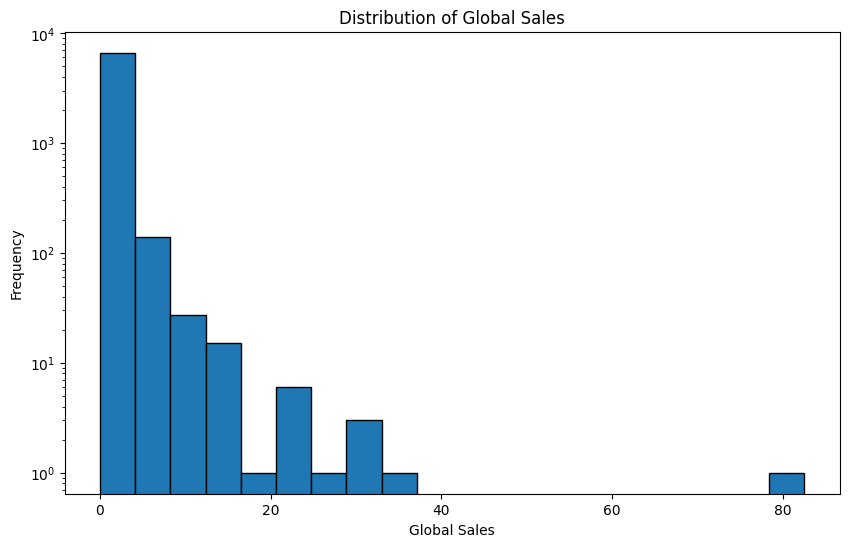

In [18]:
import matplotlib.pyplot as plt

# Assuming 'Global_Sales' is the column with the sales data
sales_data = df_vg_sales['Global_Sales']

plt.figure(figsize=(10,6))
plt.hist(sales_data, bins=20, edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')

plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

In [19]:
print(df_vg_sales.head(10))

                         Name  Platform  Year_of_Release  Genre  Publisher  \
0                  Wii Sports        12           2006.0     10        160   
2              Mario Kart Wii        12           2008.0      6        160   
3           Wii Sports Resort        12           2009.0     10        160   
6       New Super Mario Bros.         2           2006.0      4        160   
7                    Wii Play        12           2006.0      3        160   
8   New Super Mario Bros. Wii        12           2009.0      4        160   
11              Mario Kart DS         2           2005.0      6        160   
13                    Wii Fit        12           2007.0     10        160   
14         Kinect Adventures!        14           2010.0      3        144   
15               Wii Fit Plus        12           2009.0     10        160   

    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0      41.36     28.96      3.77         8.45         82.53     

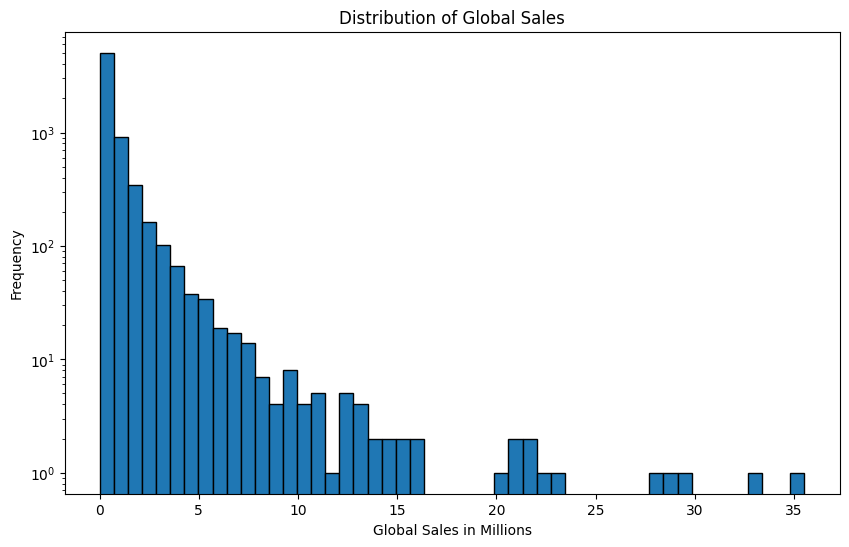

In [20]:
df_vg_no_outlier = df_vg_sales.drop(index=0)

sales_data = df_vg_no_outlier['Global_Sales']

plt.figure(figsize=(10,6))
plt.hist(sales_data, bins=50, edgecolor='black')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales in Millions')

plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

In [21]:
import numpy

res = numpy.power(3-2.4, 2) * 2/7 * 3 + numpy.power(1-2.4, 2) * 2/7 * 3 + numpy.power(4-2.4, 2) * 1/7 * 2 + numpy.power(2-2.4, 2) * 2/7 * 2

print(res)


2.811428571428571
